#       SMART PHONE BASED HUMAN ACTIVITY RECOGNITION
Link to Download DataSet : [blue_text](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions)

In [1]:
# Importing Liberies

import pandas as pd
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Defining a funtion to load a single file as a numpy array
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

#loading dataset from my PC
    
X_train = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\X_train.txt')  # Training learning variables
X_test = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\X_test.txt')     # Testing leaning variable
y_train = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\y_train.txt')  # Training labels variables
y_test = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\y_test.txt')     # Testing labels variables

print(X_train.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(y_train.shape)

#reshaping the training and testing labels

train_labels = y_train.reshape(y_train.shape[0],)
test_labels = y_test.reshape(y_test.shape[0],)

print(train_labels.shape)
print(test_labels.shape)

#creating an array for target labels

labels = ['WALKING','WALKING_UPSTAIRS ','WALKING_DOWNSTAIRS','SITTING ','STANDING','LAYING ','STAND_TO_SIT','SIT_TO_STAND',' SIT_TO_LIE',
                  'LIE_TO_SIT  ','STAND_TO_LIE ','LIE_TO_STAND ']

# Converting labels into Hot vector encoding using to_categorical function of keras

train_labels = to_categorical(train_labels,13)
test_labels = to_categorical(test_labels,13)


#Building models,our first model is multilayer perceptron(three layers with single hidden layer, one input and one output layer)
# Signle hidden layer with 64 neurons
# relu activation function in input and hidden layers
# softmax activation function for output layer

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(561,)))  # there are 561 features in the training datasets
model.add(Dense(units=13, activation='softmax'))

# provides the summer of the model
model.summary()
# Compling the model with adam optamizers and catergorical crossentropy function as loss function because of multilevel classification
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
# training the model for 60 epochs, using cross validation techinques
history = model.fit(X_train, train_labels, batch_size=1500, epochs=60, verbose=True, validation_split=.1)


Using TensorFlow backend.


(7767, 561)
(7767,)
(3162,)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                35968     
_________________________________________________________________
dense_2 (Dense)              (None, 13)                845       
Total params: 36,813
Trainable params: 36,813
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6990 samples, validate on 777 samples
Epoch 1/60





6990/6990 [==============================] - 4s 533us/step - loss: 2.1123 - acc: 0.2193 - val_loss: 1.6989 - val_acc: 0.3681
Epoch 2/60
6990/6990 [==============================] - 0s 23us/step - loss: 1.5685 - acc: 0.3948 - val_loss: 1.3775 - val_acc: 0.4852
Epoch 3/60
6990/6990 [==============================] - 0s 21us/step - loss: 1.28

3162/3162 [==============================] - 0s 50us/step


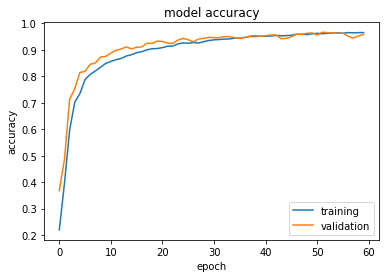

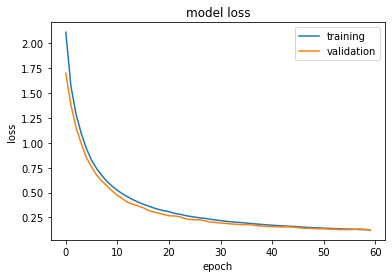

Test loss: 0.202
Test accuracy: 0.932


In [3]:
# calculating and plotting the accuracy and loss of model on test datasets

loss, accuracy  = model.evaluate(X_test, test_labels, verbose=True)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Model perfomed pretty well with accuracy 93.2%

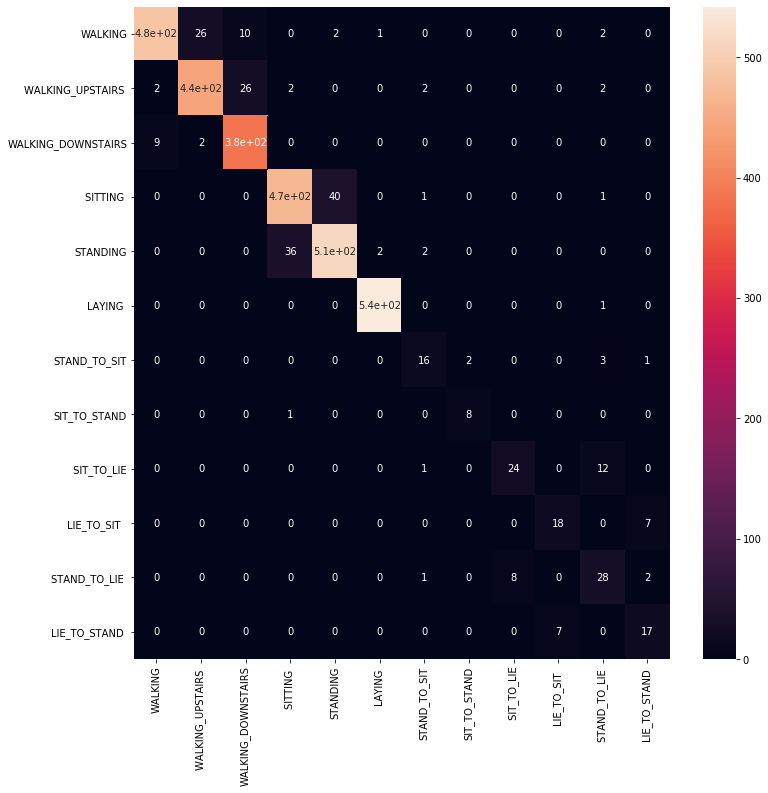

In [4]:
# When did our evaluator do poorly?
# invoking confusion matrix 

predictions = model.predict(X_test)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(test_labels, axis=1))
plt.figure(figsize = (12, 12))

sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

our model is confused between activities like:
1.sitting and standing
2.waking upstairs and walking downstairs


In [5]:
# Second model using 1D conv layers
# importing liberies for second model

from keras.layers import Dense, MaxPooling1D, Conv1D, Flatten, Dropout

#Building the model

model2 = Sequential()
# adding model layers. The first parameter is the number of filters to make at each layer.
# Meaning here the result of the first layer is 64 different "feature maps" or "activation maps"
model2.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(561,1)))
model2.add(Conv1D(32, kernel_size=3, activation='relu', padding='same',))
model2.add(Flatten())
model2.add(Dense(13, activation='softmax'))

# Lets fit it with identical parameters and see what happens...
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

conv_training_data = X_train.reshape(X_train.shape[0], 561, 1)
conv_test_data = X_test.reshape(X_test.shape[0], 561, 1)

history1 = model2.fit(conv_training_data, train_labels, batch_size=1500, epochs=10, verbose=True, validation_split=.1)

Train on 6990 samples, validate on 777 samples
Epoch 1/10
6990/6990 [==============================] - 16s 2ms/step - loss: 1.9708 - acc: 0.2486 - val_loss: 1.5580 - val_acc: 0.6474
Epoch 2/10
6990/6990 [==============================] - 12s 2ms/step - loss: 1.4242 - acc: 0.6677 - val_loss: 1.2170 - val_acc: 0.7284
Epoch 3/10
6990/6990 [==============================] - 11s 2ms/step - loss: 1.0705 - acc: 0.7727 - val_loss: 0.8649 - val_acc: 0.8366
Epoch 4/10
6990/6990 [==============================] - 11s 2ms/step - loss: 0.7748 - acc: 0.8250 - val_loss: 0.6860 - val_acc: 0.8417
Epoch 5/10
6990/6990 [==============================] - 11s 2ms/step - loss: 0.5711 - acc: 0.8538 - val_loss: 0.4667 - val_acc: 0.8700
Epoch 6/10
6990/6990 [==============================] - 11s 2ms/step - loss: 0.4257 - acc: 0.8747 - val_loss: 0.3393 - val_acc: 0.8958
Epoch 7/10
6990/6990 [==============================] - 11s 2ms/step - loss: 0.3282 - acc: 0.8963 - val_loss: 0.2808 - val_acc: 0.9060
Epoch 8/

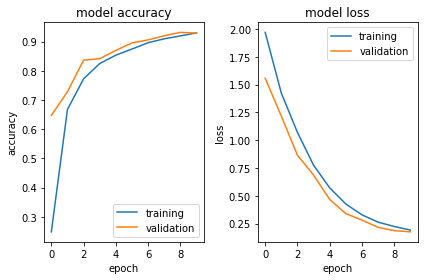

Test loss: 0.231
Test accuracy: 0.917


In [6]:
# this is a function to calculate and plot the acuuracy and loss of the model on test dataset 

def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
plot_training_history(history1, model2, eval_images=True)

Our model performed pretty well with accuracy 91.7%

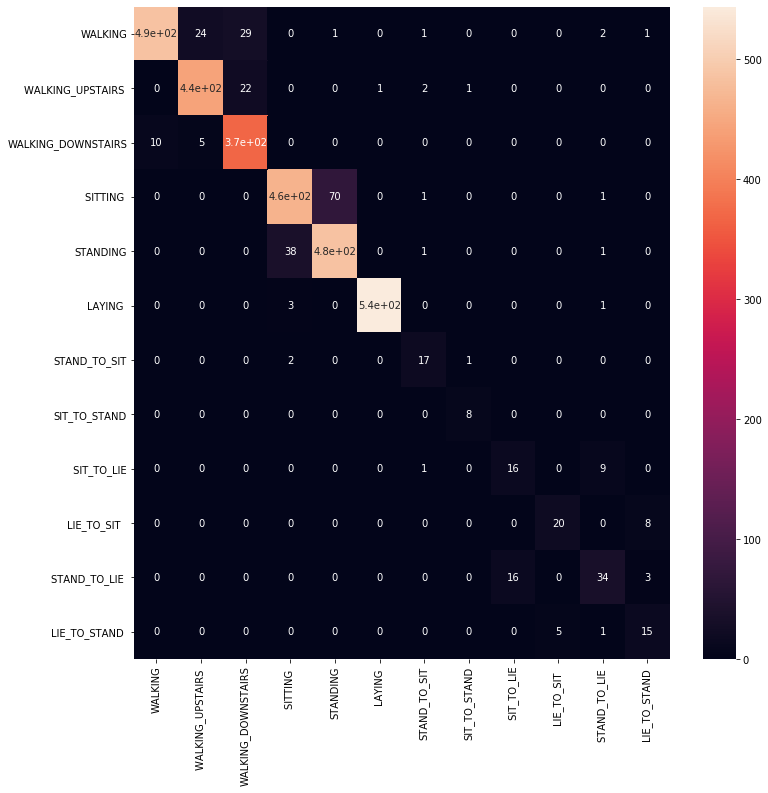

In [7]:
# Invoking Confusion matrix for the second models
predictions_model2 = model2.predict(conv_test_data )
cm1 = confusion_matrix(np.argmax(predictions_model2, axis=1), np.argmax(test_labels, axis=1))
plt.figure(figsize = (12, 12))

sn.heatmap(cm1, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

further Goals:
using models like RNN, LSTM, and final a hybrid model 
